In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/heart.csv')

**Attribute Information:**

1. age
2. sex (1= male; 0=female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable
14. defect (thallium heart scan or stress test)
15. target (0 = no heart disease; 1 = heart disease)


In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart= heart.rename(columns={'cp': 'chest_pain', 'trestbps': 'blood_pressure', 'chol':'cholestrol', 'fbs': 'blood_sugar', 'ca':'vessels'})

In [6]:
heart['health_status'] = heart['target']
heart['health_status'] = heart['health_status'].map(lambda x: 'Healthy' if x==0 else 'Unhealthy')

In [7]:
heart['gender'] = heart['sex']
heart['gender'] = heart['gender'].map(lambda x: 'Female' if x==0 else 'Male')

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   chest_pain      303 non-null    int64  
 3   blood_pressure  303 non-null    int64  
 4   cholestrol      303 non-null    int64  
 5   blood_sugar     303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalach         303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slope           303 non-null    int64  
 11  vessels         303 non-null    int64  
 12  thal            303 non-null    int64  
 13  target          303 non-null    int64  
 14  health_status   303 non-null    object 
 15  gender          303 non-null    object 
dtypes: float64(1), int64(13), object(2)
memory usage: 38.0+ KB


In [9]:
heart['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [10]:
heart['chest_pain'].unique()

array([3, 2, 1, 0])

In [11]:
heart.head()

,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Unhealthy,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Unhealthy,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Unhealthy,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Unhealthy,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Unhealthy,Female


In [12]:
heart.tail()

,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Healthy,Female
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Healthy,Male
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Healthy,Male
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Healthy,Male
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,Healthy,Female


In [13]:
heart.shape

(303, 16)

In [14]:
heart.describe()

,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
heart.isnull().sum()

age               0
sex               0
chest_pain        0
blood_pressure    0
cholestrol        0
blood_sugar       0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
vessels           0
thal              0
target            0
health_status     0
gender            0
dtype: int64

No missing values.

In [16]:
heart['health_status'].loc[heart['health_status'] == 'Healthy'].count()

138

In [17]:
heart['health_status'].loc[heart['health_status'] == 'Unhealthy'].count()

165

138 healthy people and 165 people are unhealthy in the dataset population.
Now we'll find and delete duplicate rows.

In [18]:
heart_duplicates = heart[heart.duplicated(keep=False)]
heart_duplicates

,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target,health_status,gender
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,Unhealthy,Male
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,Unhealthy,Male


In [19]:
heart.drop_duplicates(subset=None, keep='first', inplace=True)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain'}>,
        <Axes: title={'center': 'blood_pressure'}>],
       [<Axes: title={'center': 'cholestrol'}>,
        <Axes: title={'center': 'blood_sugar'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'vessels'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

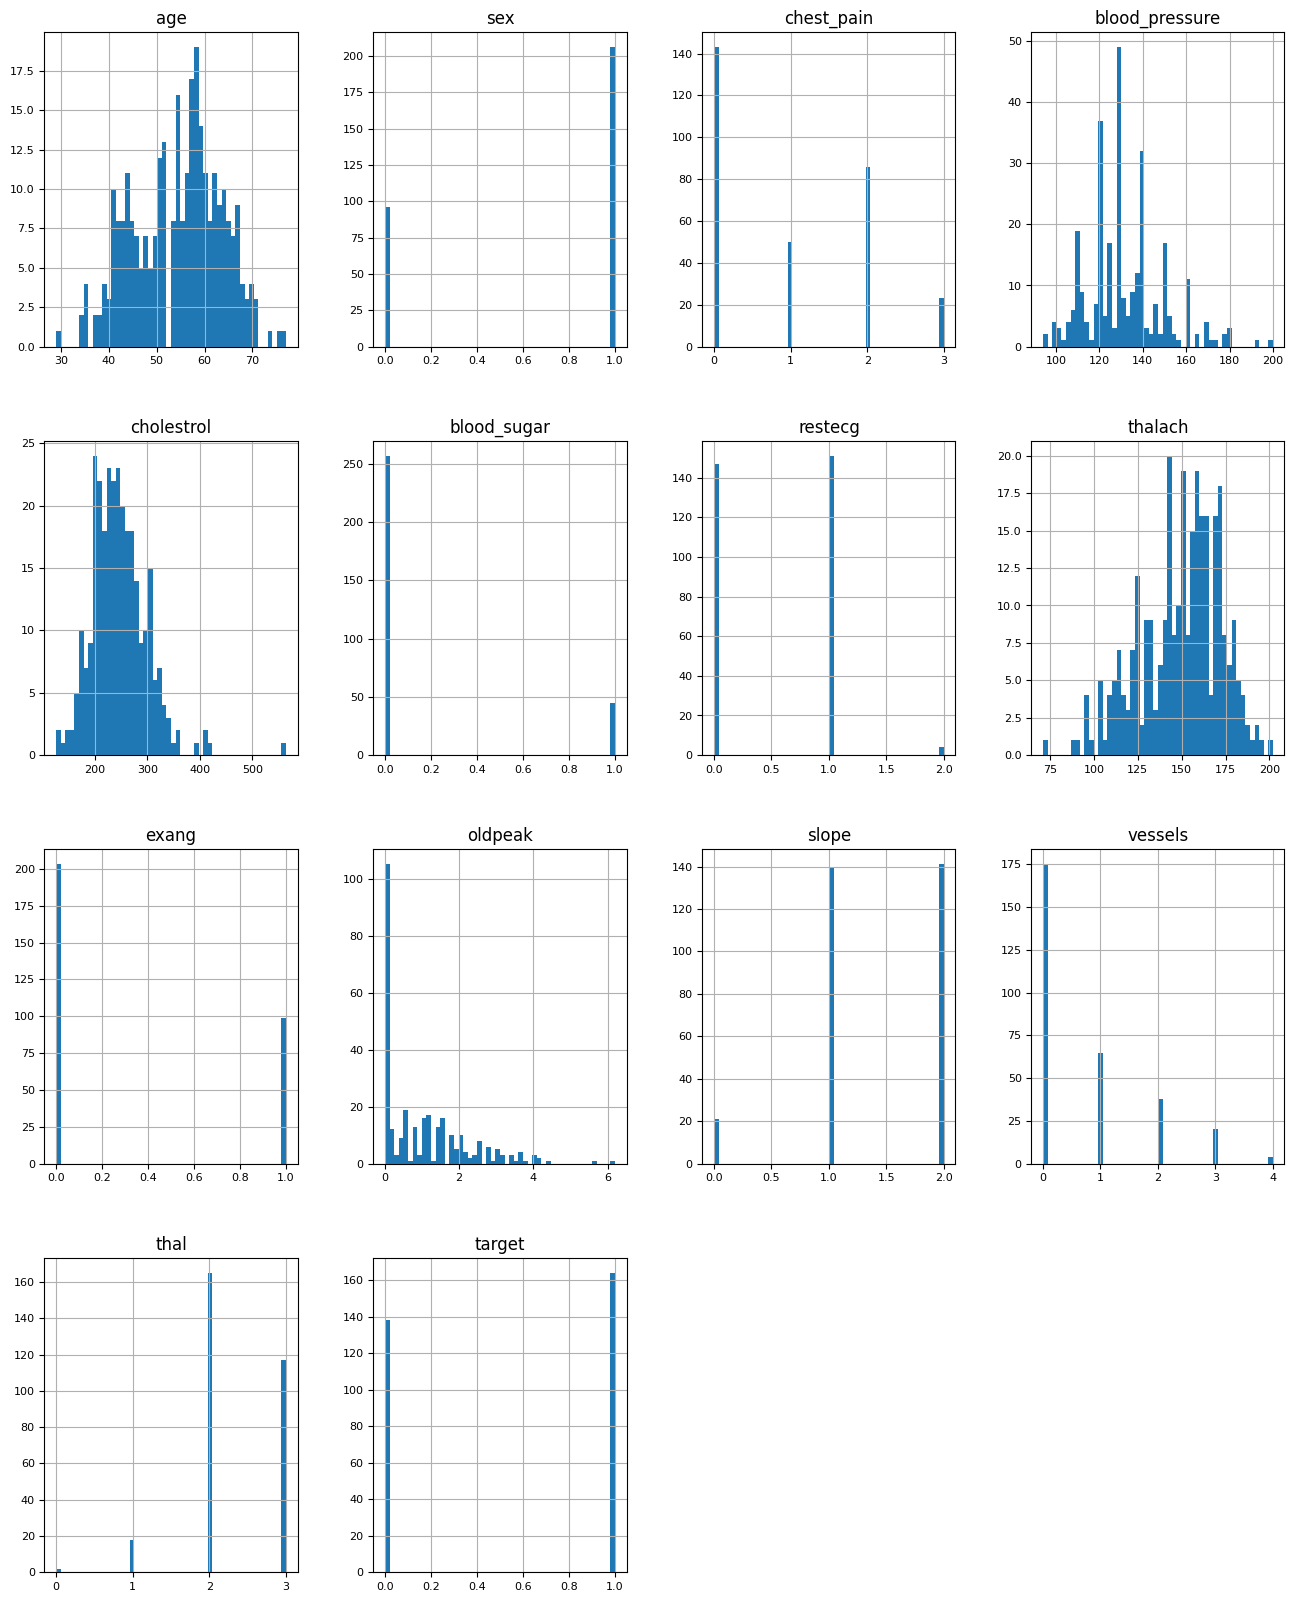

In [20]:
heart.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

In [21]:
numcolumns = heart.columns[heart.dtypes != 'object']
numcolumns

Index(['age', 'sex', 'chest_pain', 'blood_pressure', 'cholestrol',
       'blood_sugar', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'vessels', 'thal', 'target'],
      dtype='object')

Plotting BoxPlot to check Outliers (An observation point that is distant from other observations)

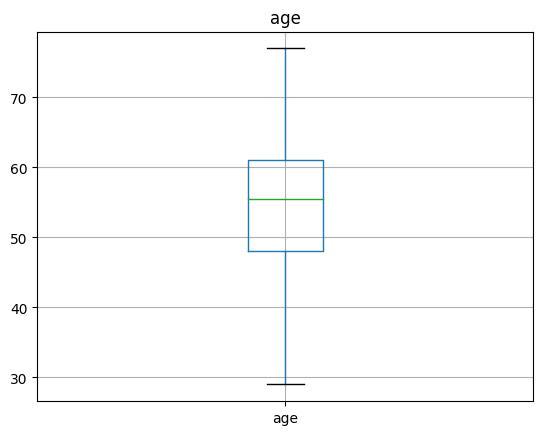

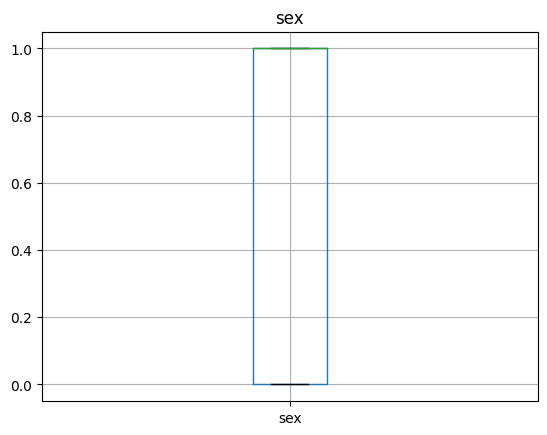

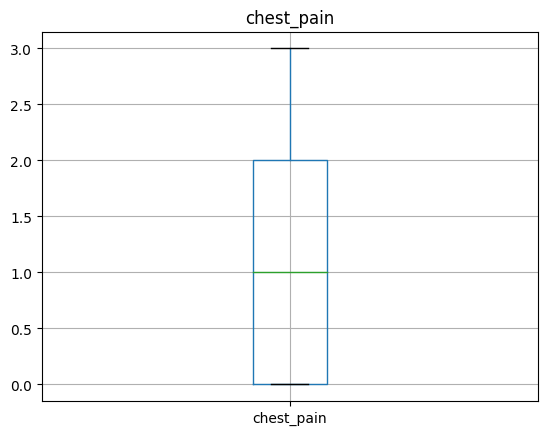

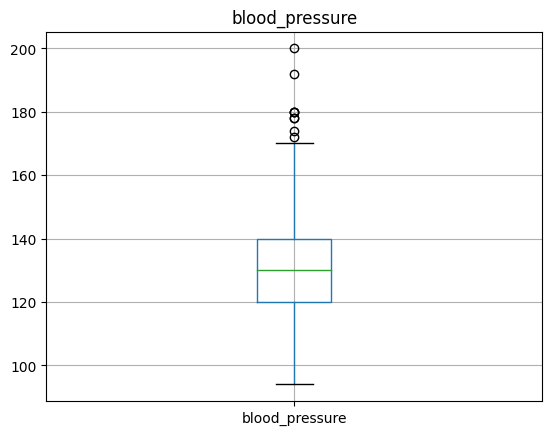

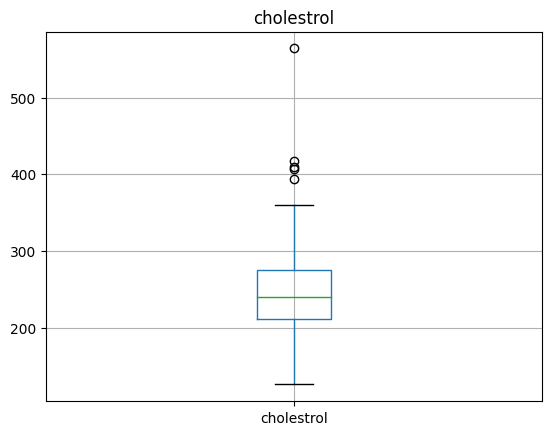

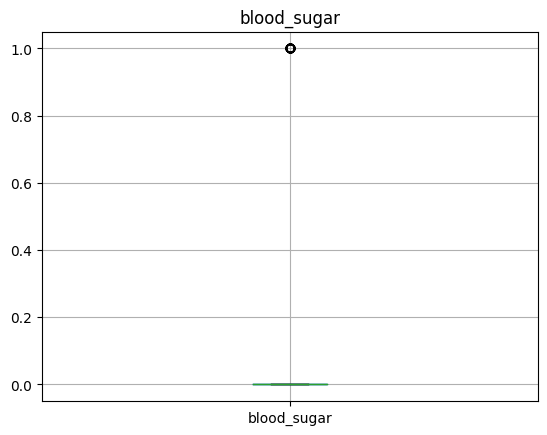

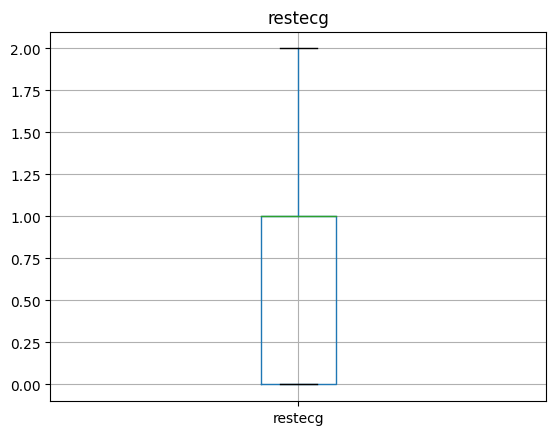

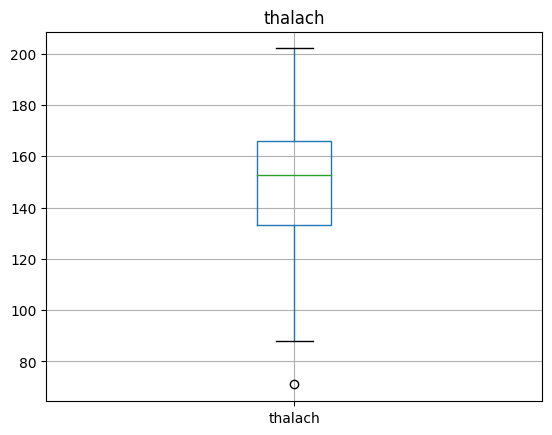

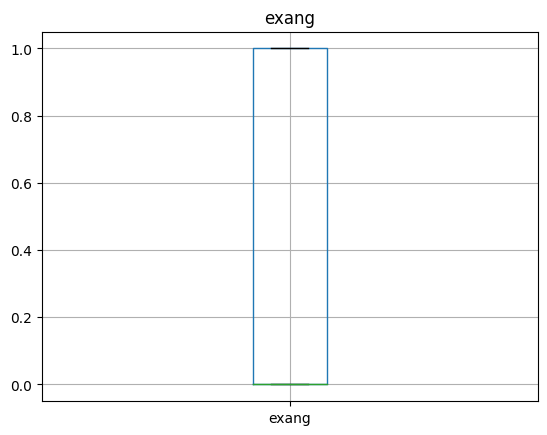

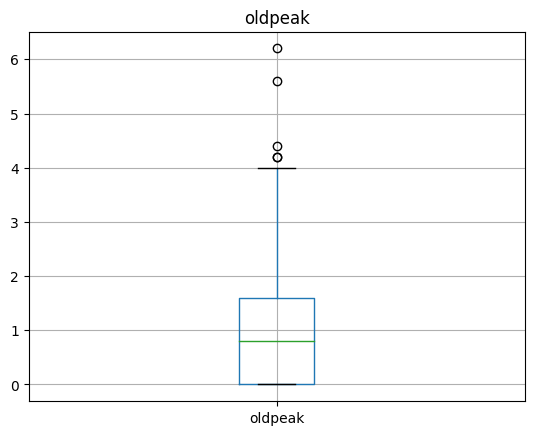

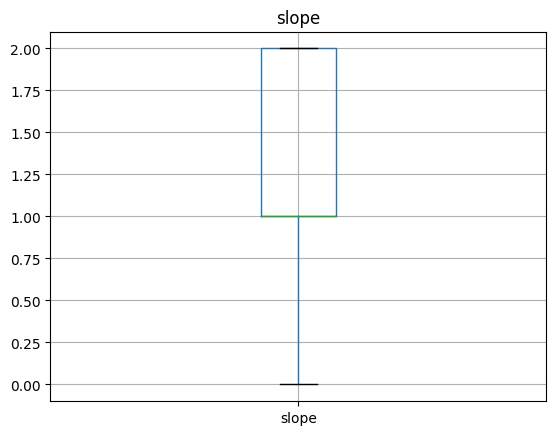

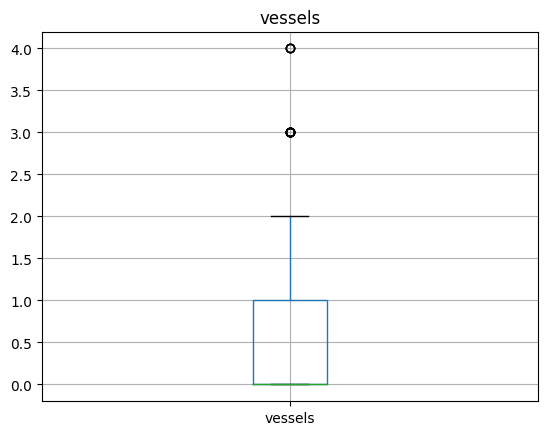

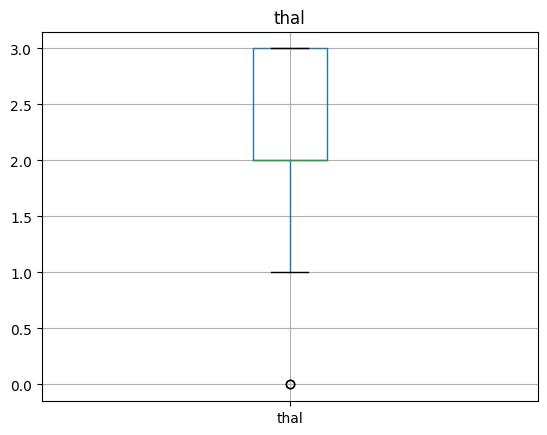

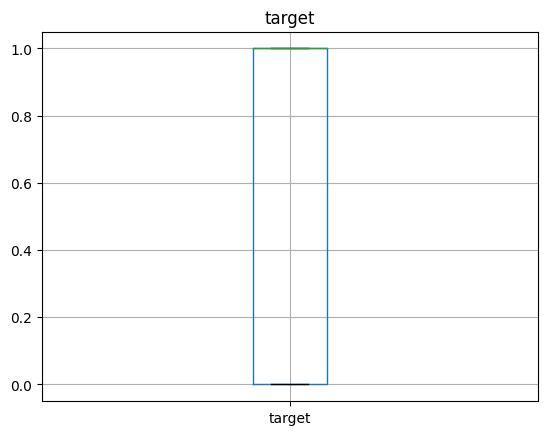

In [22]:
for column in heart:
  if column in numcolumns:
    plt.figure()
    plt.gca().set_title(column)
    heart.boxplot([column])

There are outliers in the dataset in the following columns : blood_pressure, cholestrol, blood_sugar, thalach, old_peak, vessels, thal.
However, since this is a medical dataset and the outliers could help find health related patterns, I will leave the outliers untreated.

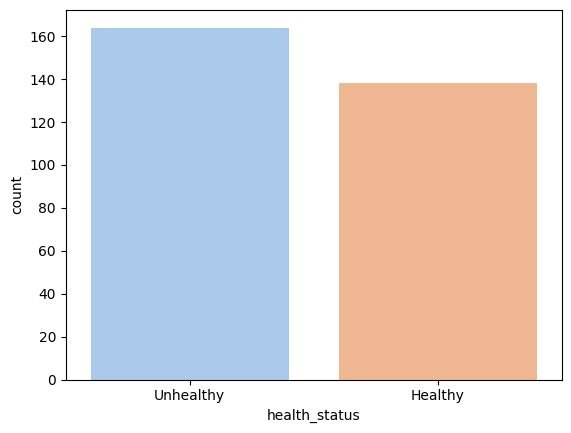

<Figure size 800x800 with 0 Axes>

In [23]:
#BarChart for Target/Health Status or can create hues using pairplot
hscount = heart['health_status'].value_counts()
hs_df = pd.DataFrame({'health_status': hscount.index, 'count':hscount.values})
sns.barplot(x='health_status', y="count", data=hs_df, palette="pastel")
plt.figure(figsize=(8,8))
plt.show()

There are more unhealthy people compared to healthy people, However, there's not a big difference.

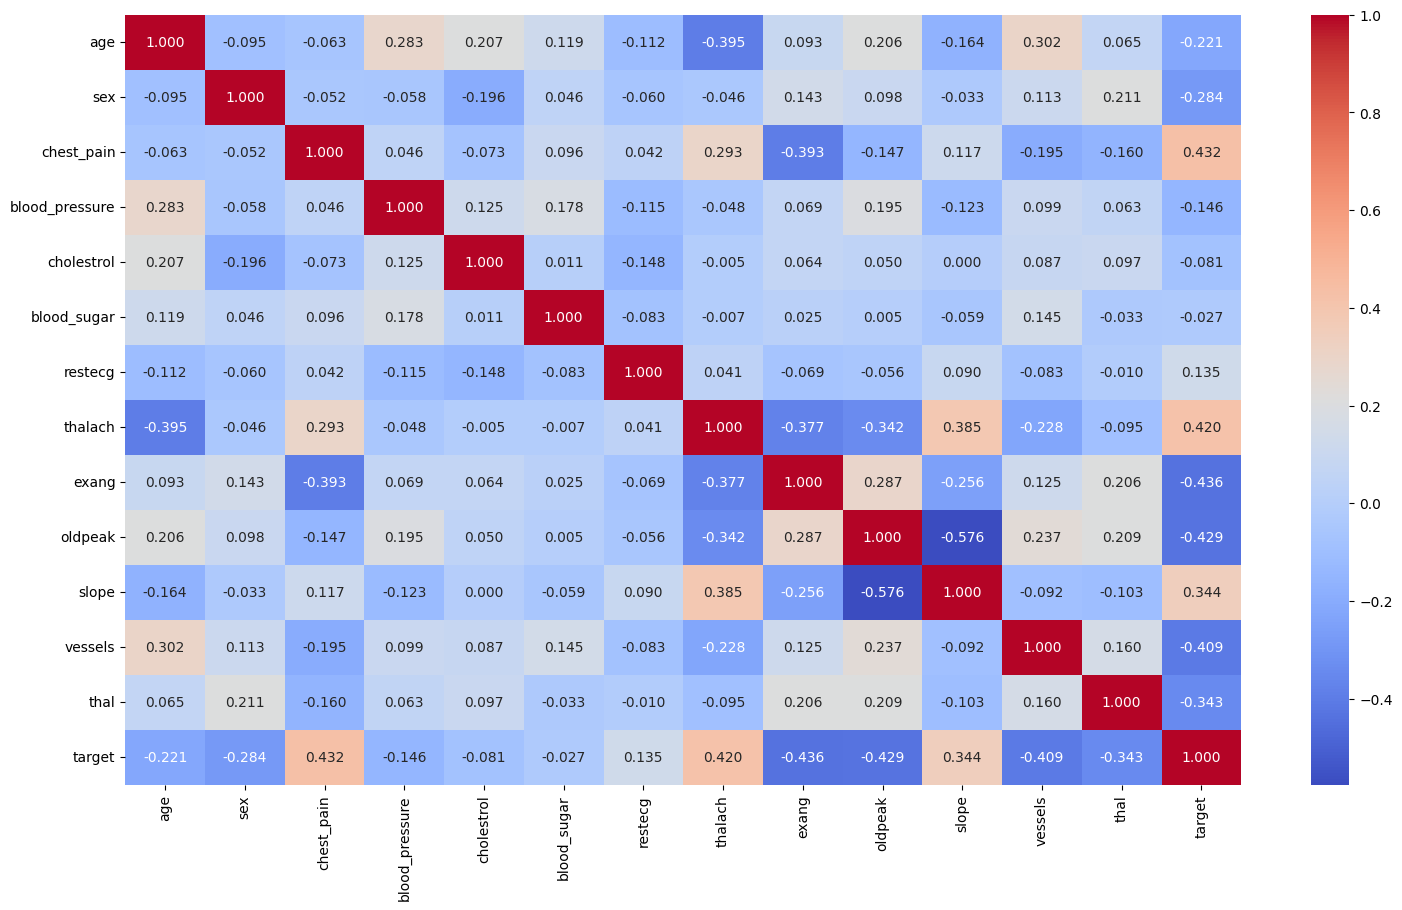

In [40]:
#Correlation Heatmap
df_corr = heart.filter(numcolumns)
corrdata = df_corr.corr()
plt.subplots(figsize=(18,10))
sns.heatmap(corrdata, cmap='coolwarm',annot=True, fmt='.3f')
plt.show()

Comparing different variables to analyze trends in the data.

In [41]:
#Men vs Women
heart['gender'].value_counts()

gender
Male      206
Female     96
Name: count, dtype: int64

There are more male records than female records in the dataset.

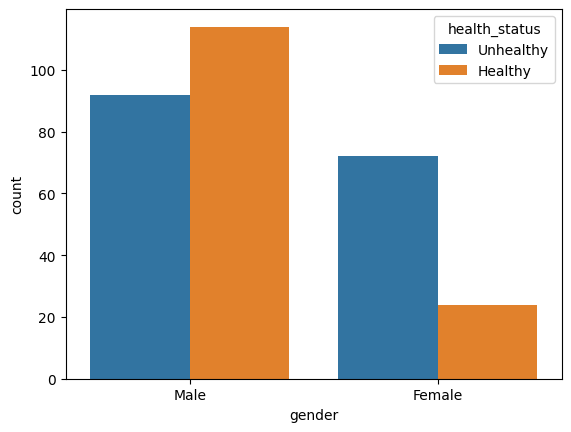

In [43]:
sns.countplot(x='gender',hue='health_status', data=heart)
plt.show()

Men are comparitively healthier than females.

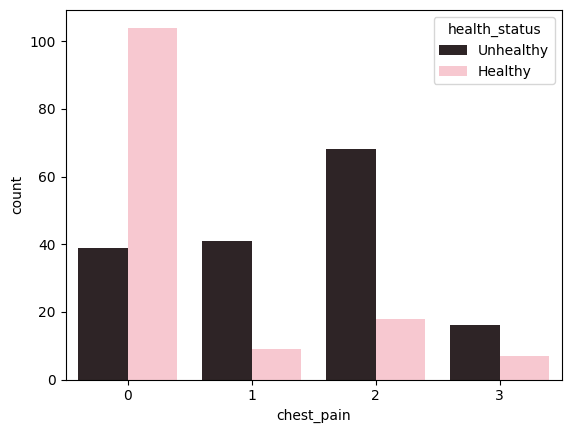

<Figure size 1200x1200 with 0 Axes>

In [55]:
sns.countplot(x='chest_pain',hue='health_status', data=heart, color="pink")
plt.show()
plt.figure(figsize=(12,12))
plt.show()

Records having a chest pain of level 2 are most likely unhealthy.

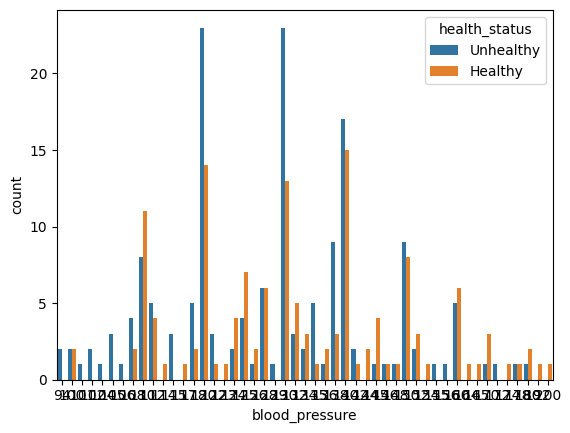

<Figure size 1200x1200 with 0 Axes>

In [64]:
sns.countplot(x='blood_pressure', hue='health_status', data=heart)
plt.figure(figsize=(12,12))
plt.show()

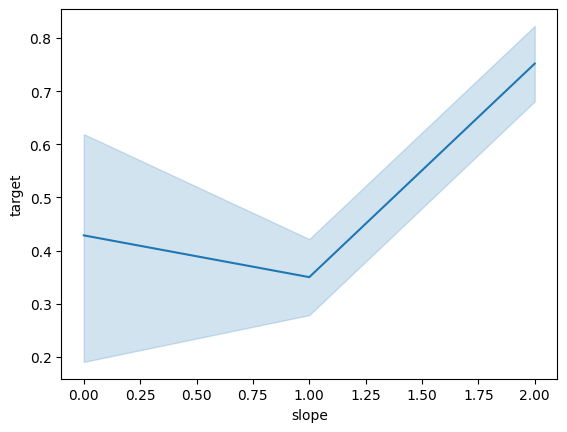

In [65]:
sns.lineplot(x='slope', y='target', data=heart)
plt.show()

The slope of 2 is most likely to be related with heart disease.

<Axes: xlabel='cholestrol', ylabel='Density'>

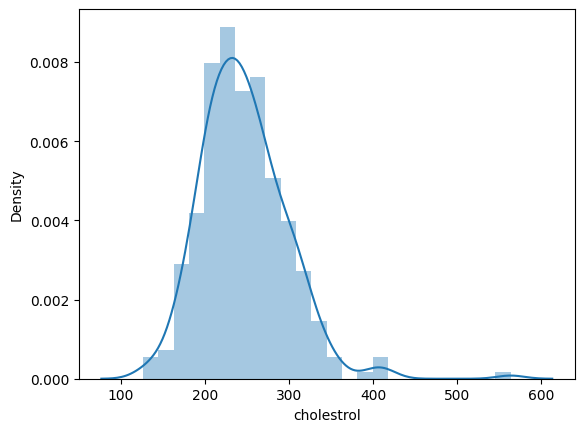

In [68]:
sns.distplot(heart['cholestrol'])

<Axes: xlabel='thalach', ylabel='Density'>

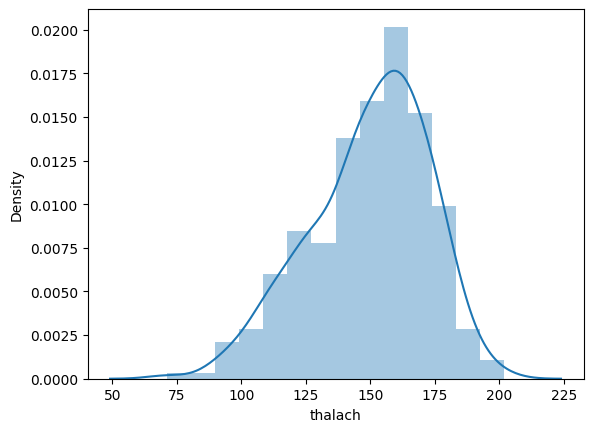

In [69]:
sns.distplot(heart['thalach'])

<Axes: xlabel='thalach', ylabel='count'>

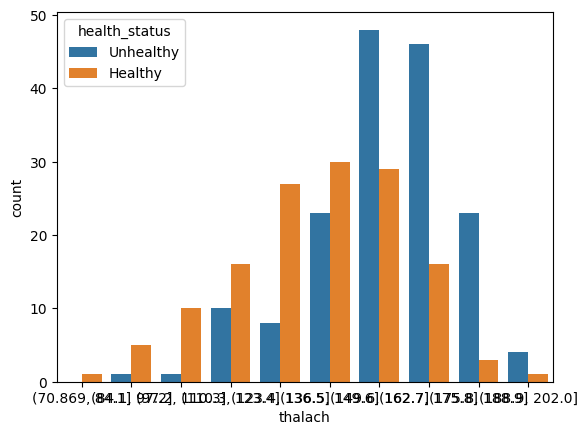

In [71]:
sns.countplot(x=pd.cut(heart['thalach'], 10), hue="health_status", data=heart)

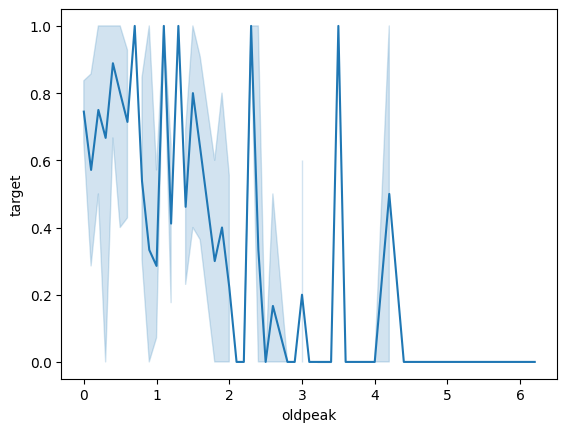

In [72]:
sns.lineplot(x='oldpeak', y='target', data=heart)
plt.show()

<Axes: xlabel='vessels', ylabel='target'>

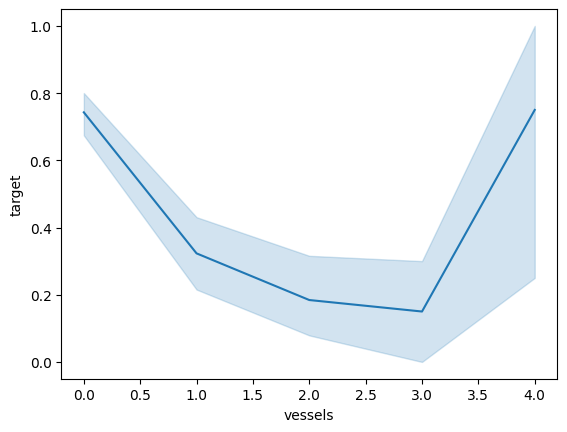

In [73]:
sns.lineplot(x='vessels', y='target', data=heart)

<Axes: xlabel='blood_sugar', ylabel='target'>

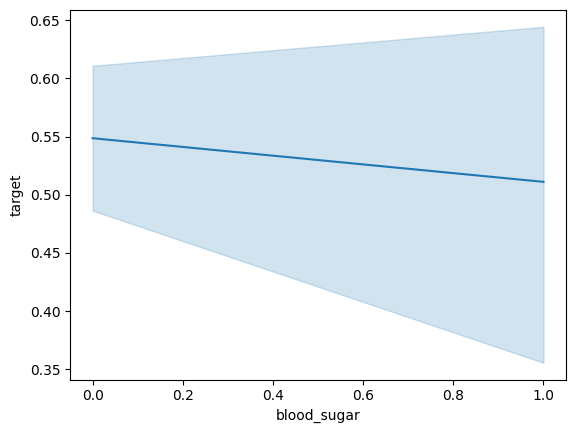

In [75]:
sns.lineplot(x='blood_sugar', y='target', data=heart)

With the above visualizations, we can conclude that the number of vessels colored by a fluoroscopy, thalach, oldpeak, blood pressure, cholesterol, and chest pain are factors that play a major role in determining the health of the person.